# Airfoil Explorer

Notebook to quickly select and plot airfoils from the UIUC airfoil data base. It might do more stuff in the future

Quick instructions:

This file **must** be part of your nemo repository and thus is located at NEMO_ROOT/wings

You **must** have placed a shortcut/symlink to the dropbox folder at your NEMO_ROOT called 'dbfiles'

- Authors: Diego Montero, Fernando Valentini, Gustavo Violato
- First release: Nov. 2015

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import os
import os.path as pth
import airfoil_tools as at
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.html import widgets
from glob import glob

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
# User defines variables

root = os.environ['NEMO_ROOT']
airfoil_db_path = root+'/dbfiles/subsistemas/airfoils/uiuc/coordinates'
polar_db_path = root+'/dbfiles/subsistemas/airfoils/uiuc/results'

In [4]:
foilfiles = glob(airfoil_db_path+'/*.dat')
foilnames = [pth.basename(foil)[:-4] for foil in foilfiles]
foilnames.sort()

(0, 1)

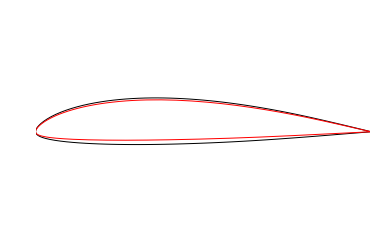

In [5]:
foilname = ['mrc-16']
match = [fpth for fpth in foilfiles if foilname[0] in fpth]
airfoil = at.ReadAirfoil(match[0])
tck     = at.GetFoilThickness(airfoil)
camberl = at.GetFoilCamberline(airfoil)
props   = at.GetFoilProps(airfoil)
mod_tck = 0.12/props['t/c']*tck[:,1:]
mod_cbr = 0.035/props['h/c']*camberl[:,1:]
mod_up  = mod_cbr + mod_tck/2
mod_lo  = mod_cbr - mod_tck/2
mod_c_up = np.hstack((tck[::-1,0:1],mod_up[::-1,0:]))
mod_c_lo = np.hstack((tck[1:,0:1],mod_lo[1:,0:]))
mod_coords = np.vstack((mod_c_up,mod_c_lo))
fig, ax = plt.subplots()
plt.plot(airfoil['coords'][:,0],airfoil['coords'][:,1],'k')
plt.plot(mod_coords[:,0],mod_coords[:,1],'r')
plt.axis('equal')
plt.axis('off')
ax.set_xlim([0, 1])
#print mod_coords

In [6]:
mod_airfoil={'name':'GV08','coords':mod_coords}
at.WriteAirfoil('./gv08.dat',mod_airfoil)

t/c: 0.073
h/c: 0.040


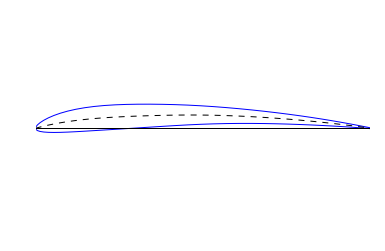

In [6]:
def plotchosenfoil(foilname):
    match = [fpth for fpth in foilfiles if foilname[0] in fpth]
    airfoil = at.ReadAirfoil(match[0])
    props = at.GetFoilProps(airfoil)
    for k in props.keys():
        print k + ': {:.3f}'.format(props[k])
    plt.plot(airfoil['coords'][:,0],airfoil['coords'][:,1])
    plt.plot([0,1],[0,0],'k')
    camberl = at.GetFoilCamberline(airfoil)
    plt.plot(camberl[:,0],camberl[:,1],'k--')
    plt.axis('equal')
    plt.axis('off')

widgets.interact(plotchosenfoil,
                 foilname=widgets.SelectMultiple(
        description="airfoils",
        options=foilnames))

In [5]:
polarfiles = glob(polar_db_path+'/*.pol')
pol_foilnames = [pth.basename(foil)[:-4] for foil in polarfiles]
pol_foilnames.sort()

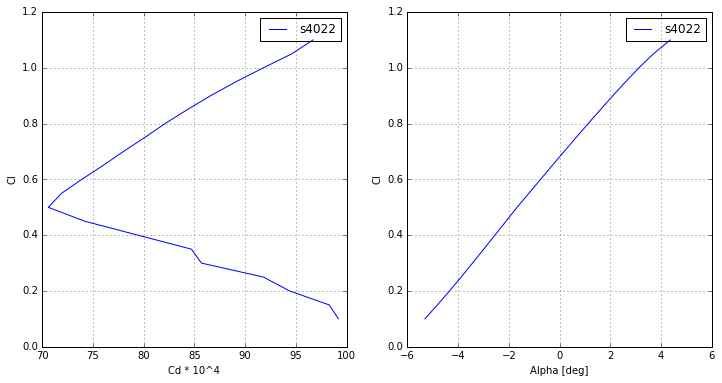

In [6]:
def plotpolar(foilname):
    fig = plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.xlabel('Cd * 10^4')
    plt.ylabel('Cl')
    plt.grid(True)
    plt.subplot(1,2,2)
    plt.xlabel('Alpha [deg]')
    plt.ylabel('Cl')
    plt.grid(True)
    for foil in foilname:
        match = [fpth for fpth in polarfiles if foil in fpth]
        polar = np.loadtxt(match[0],skiprows=12)
        ax1 = plt.subplot(1,2,1)
        plt.plot(polar[:,2]*1e4,polar[:,1],label=foil)
        ax2 = plt.subplot(1,2,2)
        plt.plot(polar[:,0],polar[:,1],label=foil)
    ax1.legend()
    ax2.legend()
 
widgets.interact(plotpolar,
                 foilname=widgets.SelectMultiple(
        description="airfoils",
        options=pol_foilnames))

In [11]:
foil='gv03'
match = [fpth for fpth in polarfiles if foil in fpth]
polar = np.loadtxt(match[0],skiprows=12)
print polar[8,2], polar[8,1]

0.00696 0.5
